## Data Source

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one.

Details of what the letters for each column represents can be found here: https://www.kaggle.com/uciml/mushroom-classification

To facililtate visualisation and readability, I will transform the dataset by replacing the codes with the full text. This will be done by using a dictionary to map labels with the actual description in the website.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read in mushrooms dataset
df=pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


I will replace code values per column with actual values to help readers understand. Most of the columns are categorical with the exception of ring-number. I will transform ring-number to quantitative data.

In [3]:
values={"p":"poisonous", "e":"edible"}
df["class"]=df["class"].replace(values)
df.head()

values={"b":"bell", "c":"conical","x":"convex","f":"flat","k":"knobbed","s":"sunken"}
df["cap-shape"]=df["cap-shape"].replace(values)
df.head()

values={"f": "fibrous", "g": "grooves","y":"scaly","s": "smooth"}
df["cap-surface"]=df["cap-surface"].replace(values)

values={"n":"brown","b":"buff","c":"cinnamon","g":"gray","r":"green","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
df["cap-color"]=df["cap-color"].replace(values)

values={"t":"true","f":"false"}
df["bruises"]=df["bruises"].replace(values)

values={"a":"almond","l":"anise","c":"creosote","y":"fishy","f":"foul","m":"musty","n":"none","p":"pungent","s":"spicy"}
df["odor"]=df["odor"].replace(values)

values={"a":"attached","f":"free"}
df["gill-attachment"]=df["gill-attachment"].replace(values)

values={"c":"close","w":"crowded", "d":"distant"}
df["gill-spacing"]=df["gill-spacing"].replace(values)

values={"b":"broad","n":"narrow"}
df["gill-size"]=df["gill-size"].replace(values)

values={"k":"black","b":"buff","n":"brown","h":"chocolate","g":"gray","r":"green","o":"orange","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
df["gill-color"]=df["gill-color"].replace(values)

values={"t":"tapering","e":"enlarging"}
df["stalk-shape"]=df["stalk-shape"].replace(values)

values={"b":"bulbous","c":"club","e":"equal","z":"rhizomorphs","r":"rooted","?":"missing"}
df["stalk-root"]=df["stalk-root"].replace(values)

values={"s":"smooth","k":"silky","f":"fibrous","y":"scaly"}
df["stalk-surface-above-ring"]=df["stalk-surface-above-ring"].replace(values)
df["stalk-surface-below-ring"]=df["stalk-surface-below-ring"].replace(values)

values={"n":"brown","b":"buff","c":"cinnamon","g":"gray","o":"orange","p":"pink","e":"red","w":"white","y":"yellow"}
df["stalk-color-above-ring"]=df["stalk-color-above-ring"].replace(values)
df["stalk-color-below-ring"]=df["stalk-color-below-ring"].replace(values)

values={"p":"partial","u":"universal"} 
df["veil-type"]=df["veil-type"].replace(values)

values={"n":"brown","o":"orange","w":"white","y":"yellow"} 
df["veil-color"]=df["veil-color"].replace(values)

values= {"n":0,"o":1,"t":2}
df["ring-number"]=df["ring-number"].replace(values)

values={"c":"cobwebby","e":"evanescent","f":"flaring","l":"large","n":"none","p":"pendant","s":"sheathing","z":"zone"}
df["ring-type"]=df["ring-type"].replace(values)

values= {"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green","o":"orange","u":"purple","w":"white","y":"yellow"}
df["spore-print-color"]=df["spore-print-color"].replace(values)

values={"a":"abundant","c":"clustered","n":"numerous","s":"scattered","v":"several","y":"solitary"}
df["population"]=df["population"].replace(values)

values={"g":"grasses","l":"leaves","m":"meadows","p":"paths","u":"urban","w":"waste","d":"woods"}
df["habitat"]=df["habitat"].replace(values)

Let's have a look at the transformed data

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,true,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,true,almond,free,close,broad,black,...,smooth,white,white,partial,white,1,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,true,anise,free,close,broad,brown,...,smooth,white,white,partial,white,1,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,true,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
4,edible,convex,smooth,gray,false,none,free,crowded,broad,black,...,smooth,white,white,partial,white,1,evanescent,brown,abundant,grasses


## Implementation

### Exploratory Data Analysis

**Check basic info concerning data set, including missing values**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [6]:
#check for null values
df.isnull().any()

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

In [7]:
df.describe()

,ring-number
count,8124.000000
mean,1.069424
std,0.271064
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


**Check the relative size of poisonous vs edible mushroom**

In [8]:
#We attempt to find out the percentage of edible mushrooms
print('Percentage of edible mushrooms expressed as decimal:')
print(round((df[df["class"] == 'edible'].iloc[:,0].count()/df.iloc[:,0].count())*100,2))

Percentage of edible mushrooms expressed as decimal:
51.8


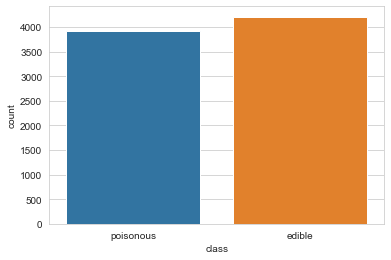

In [9]:
sns.set_style('whitegrid')
ax = sns.countplot(x="class", data=df)

**Is there a pattern of mushrooms being poisonous based on cap-shape?**

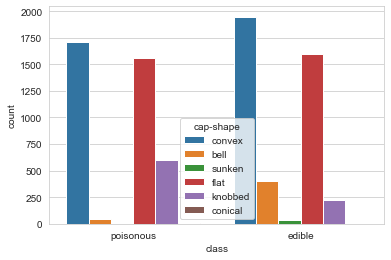

In [10]:
ax = sns.countplot(x="class", hue="cap-shape", data=df)

**Is there a pattern of mushrooms being poisonous based on cap-surface?**

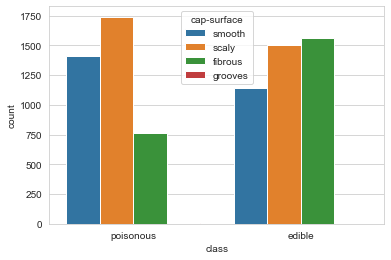

In [11]:
ax = sns.countplot(x="class", hue="cap-surface", data=df)

**Is there a pattern of mushrooms being poisonous based on cap-colour?**

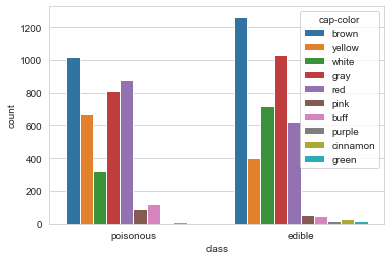

In [12]:
ax = sns.countplot(x="class", hue="cap-color", data=df)

**Is there a pattern of mushrooms being poisonous based on bruises?**

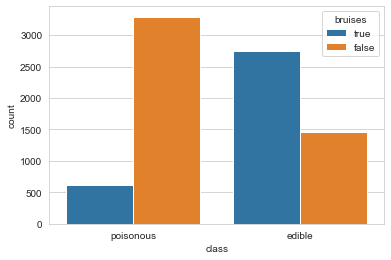

In [13]:
ax = sns.countplot(x="class", hue="bruises", data=df)

**Is there a pattern of mushrooms being poisonous based on odor?**

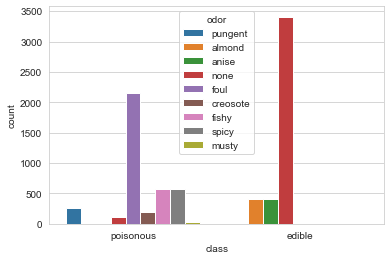

In [14]:
ax = sns.countplot(x="class", hue="odor", data=df)

Most of poisonous mushroom have foul smell. Let us plot odor against mushroom class for another form of visualisation. We can see all mushrooms with foul odor are poisonous. Most mushrooms with no odor are edible.

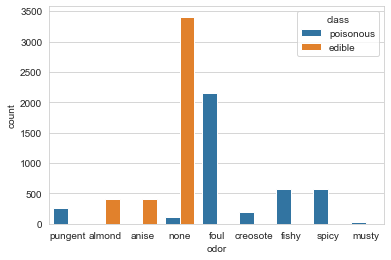

In [15]:
ax = sns.countplot(x="odor", hue="class", data=df)

**Is there a pattern of mushrooms being poisonous based on gill-colour?**

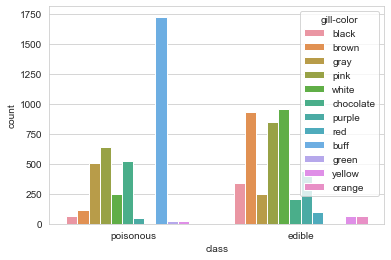

In [16]:
ax = sns.countplot(x="class", hue="gill-color", data=df)

Most of poisonous mushroom have buff gill-colour. Let us plot the gill-colour against mushroom class for another form of visualisation. We can see all mushrooms with buff gill-colour are poisonous.

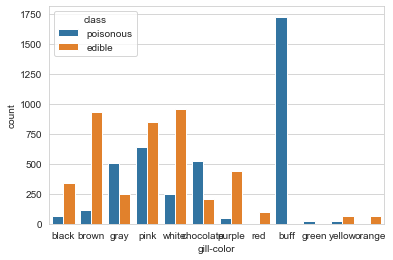

In [17]:
ax = sns.countplot(x="gill-color", hue="class", data=df)

**Is there a pattern of mushrooms being poisonous based on gill-size?**

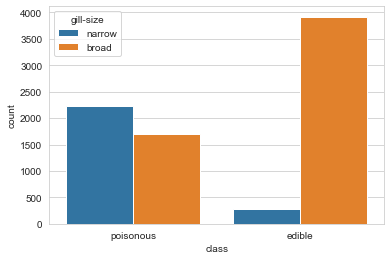

In [18]:
ax = sns.countplot(x="class", hue="gill-size", data=df)

**Is there a pattern of mushrooms being poisonous based on stalk-colour above and below ring?**

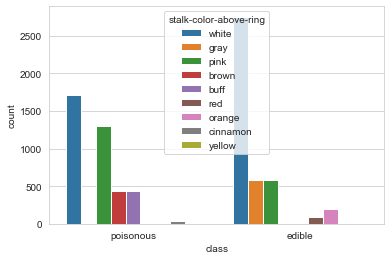

In [19]:
ax = sns.countplot(x="class", hue="stalk-color-above-ring", data=df)

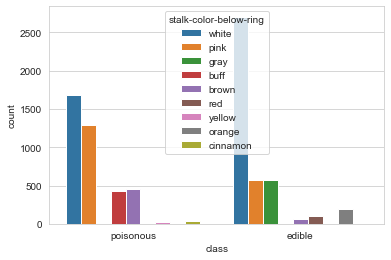

In [20]:
ax = sns.countplot(x="class", hue="stalk-color-below-ring", data=df)

There is not much distinct pattern here and we will drop this

**Is there a pattern of mushrooms being poisonous based on stalk surface?**

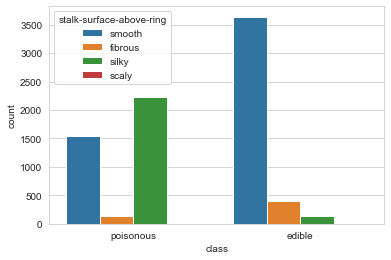

In [21]:
ax = sns.countplot(x="class", hue="stalk-surface-above-ring", data=df)

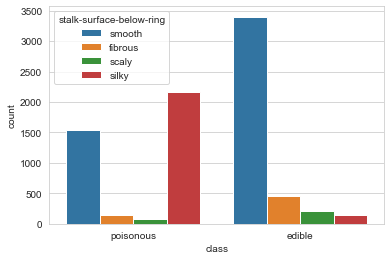

In [22]:
ax = sns.countplot(x="class", hue="stalk-surface-below-ring", data=df)

Most poisonous mushrooms have silky stalk surface below ring.

**Is there a pattern of mushrooms being poisonous based on ring-number?**

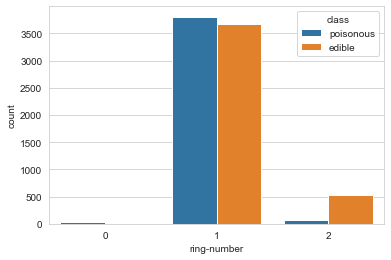

In [23]:
ax = sns.countplot(x="ring-number", hue="class", data=df)

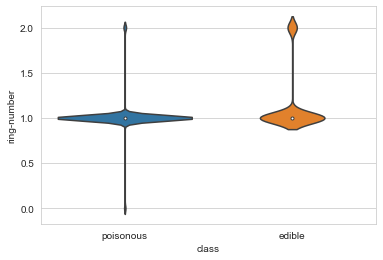

In [24]:
ax = sns.violinplot(x="class", y="ring-number", data=df)

Most poisonous and edible mushrooms have 1 ring. A minority of mushrooms has 0 ring and they are all poisonous. Some have 2 rings and are mostly edible.

**Is there a pattern of mushrooms being poisonous based on ring-type?**

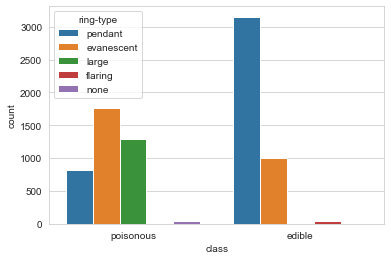

In [25]:
ax = sns.countplot(x="class", hue="ring-type", data=df)

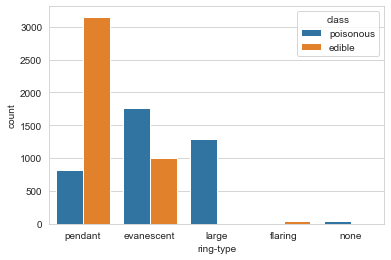

In [26]:
ax = sns.countplot(x="ring-type", hue="class", data=df)

All mushrooms with large ring-type are poisonous. Majority of the mushrooms with pendant ring-type are edible.

**Is there a pattern of mushrooms being poisonous based on Spore Print Colour?**

AxesSubplot(0.125,0.125;0.775x0.755)


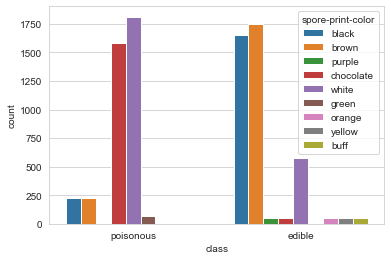

In [27]:
ax = sns.countplot(x="class", hue="spore-print-color",data=df)
print(ax)

AxesSubplot(0.125,0.125;0.775x0.755)


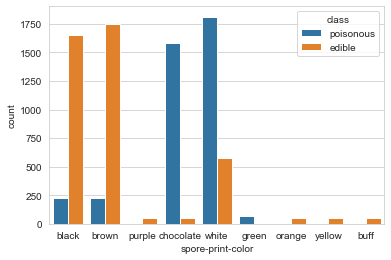

In [28]:
ax = sns.countplot(x="spore-print-color", hue="class",data=df)
print(ax)

Most mushrooms with spore print colour as black and brown are edible, and most with chocolate and white are poisonous.

**Next, we examine if there is relationship between mushrooms being poisonous/edible against their population**

AxesSubplot(0.125,0.125;0.775x0.755)


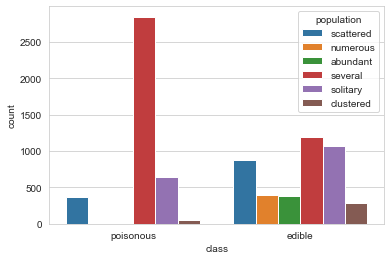

In [29]:
ax = sns.countplot(x="class", hue="population",data=df)
print(ax)

All edible mushrooms can be found grown in numerous or abundant population

**We also examine the habitat**

AxesSubplot(0.125,0.125;0.775x0.755)


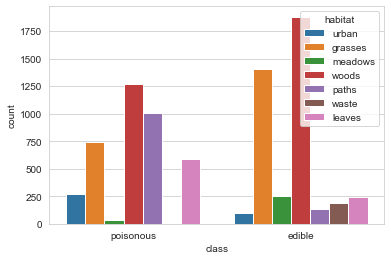

In [30]:
ax = sns.countplot(x="class", hue="habitat",data=df)
print(ax)

### Feature Selection and Implementation of Machine Learning

During Exploratory Data Analysis, we are unable to find any distinct patterns on the Stalk Colour Above Ring and Stalk Colour Below Ring. We will drop these 2 features.

In [31]:
df=df.drop(columns=['stalk-color-above-ring', 'stalk-color-below-ring'])

In [32]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,true,pungent,free,close,narrow,black,...,equal,smooth,smooth,partial,white,1,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,true,almond,free,close,broad,black,...,club,smooth,smooth,partial,white,1,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,true,anise,free,close,broad,brown,...,club,smooth,smooth,partial,white,1,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,true,pungent,free,close,narrow,brown,...,equal,smooth,smooth,partial,white,1,pendant,black,scattered,urban
4,edible,convex,smooth,gray,false,none,free,crowded,broad,black,...,equal,smooth,smooth,partial,white,1,evanescent,brown,abundant,grasses


In [33]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
veil-type                   object
veil-color                  object
ring-number                  int64
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

As we have categorical data, we use Label Encoder to replace them so they can be classified

In [34]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [35]:
for i in df.columns:
    if str(i)!='class':
        df[i]=encoder.fit_transform(df[i])

In [36]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,2,3,0,1,7,1,0,1,0,...,2,3,3,0,2,1,4,0,3,4
1,edible,2,3,9,1,0,1,0,0,0,...,1,3,3,0,2,1,4,1,2,0
2,edible,0,3,8,1,1,1,0,0,1,...,1,3,3,0,2,1,4,1,2,2
3,poisonous,2,2,8,1,7,1,0,1,1,...,2,3,3,0,2,1,4,0,3,4
4,edible,2,3,3,0,6,1,1,0,0,...,2,3,3,0,2,1,0,1,0,0


### Decision Tree Analysis

In general, Decision Tree Analysis is a predictive modelling tool that can be applied across many areas. Decision trees can be constructed by an algorithmic approach that can split the dataset in different ways based on different conditions.
Decisions tress are the most powerful algorithms that falls under the category of supervised algorithms.
Our data largely consist of qualitative data. In our case, the decision variable is categorial. This is known as Classification Decision Tree. This method will provide a clear indication of the most important features for classification.

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x=df.iloc[:,1:] #drop the labels
y=df.iloc[:,0:1] #pick up labels
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
clf=DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(result)
print("\n")

result1=classification_report(y_test,y_pred)
print("Classification Report:")
print(result1)
print("\n")

result2=accuracy_score(y_test,y_pred)
print("Accuracy:")
print(result2)

Confusion Matrix:
[[1277    0]
 [   0 1161]]


Classification Report:
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      1277
   poisonous       1.00      1.00      1.00      1161

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Accuracy:
1.0


**The supervised machine model has classified mushrooms with 100% accuracy. 100% of classification are in True Positives and True Negatives as shown in the Confusion Matrix, Classification Report and Accuracy above.**

## Conslusion

C:\Users\kawei.quek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


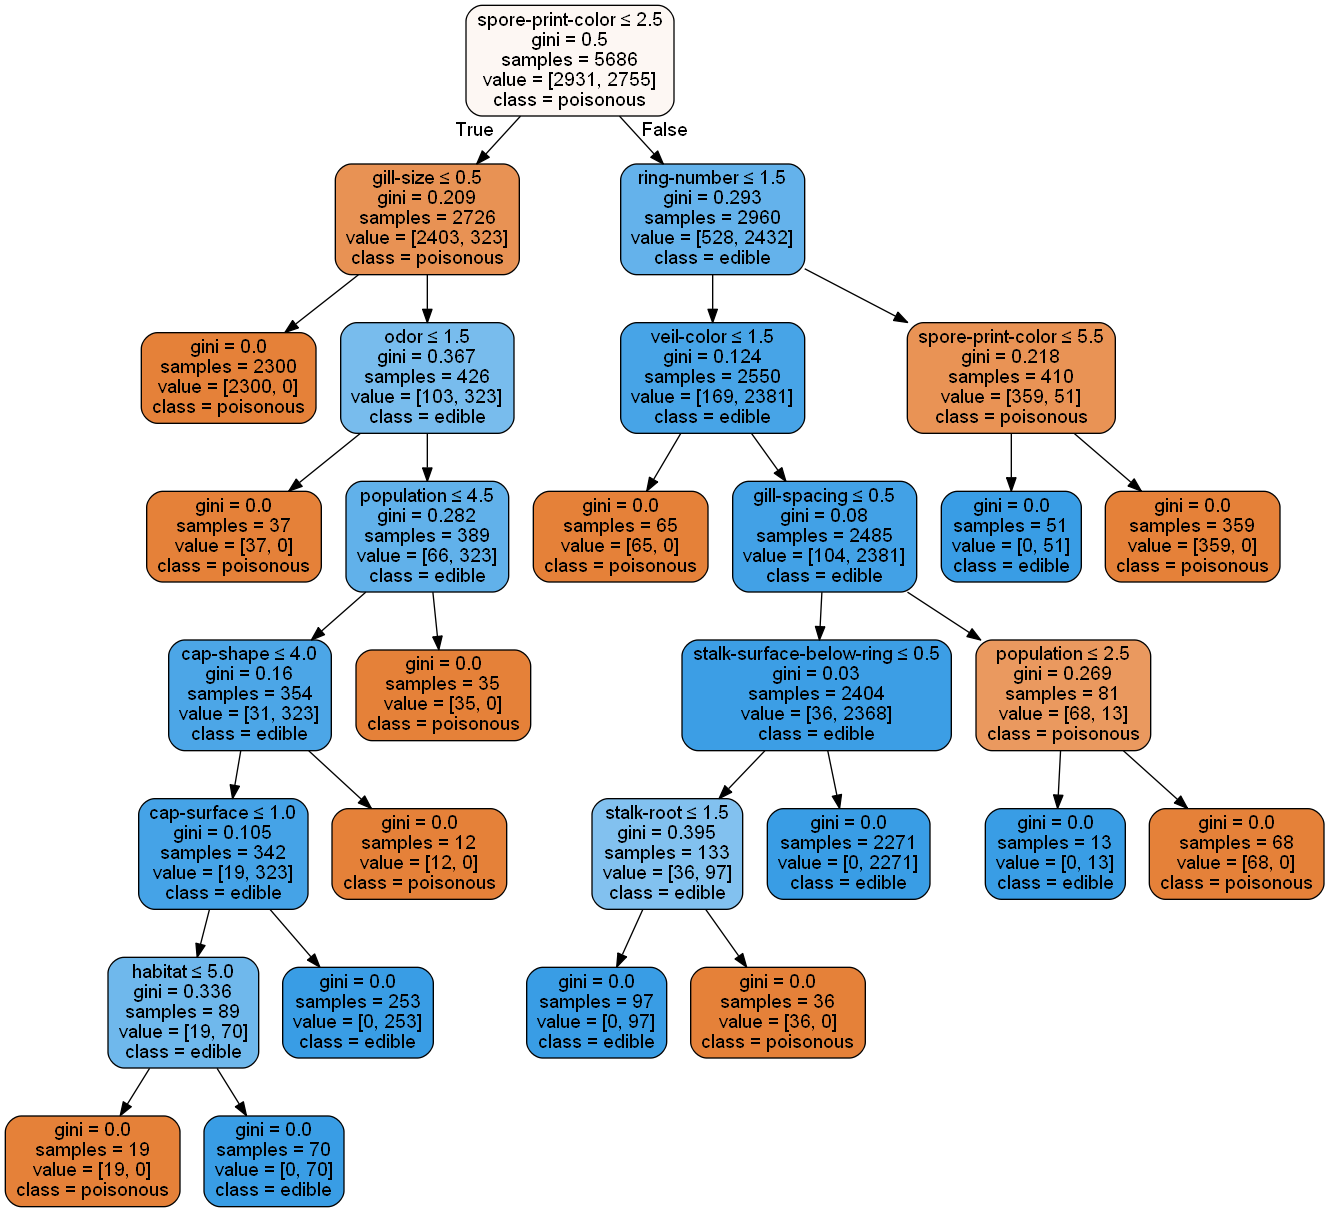

In [38]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=list(df.columns[1:]) ,class_names=df['class'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('mushroom_decisions.png')
Image(graph.create_png())

The most important feature in predicting whether a mushroom is poisonous or edible is looking at Spore Print Colour. Most mushrooms with black, brown or buff Spore Print Colour are poisonous. By looking into this we can correctly identify 87% of the poisonous mushrooms and 83% of the edible mushrooms.

After looking at Spore Print Colour, if the mushroom is determined to be edible, we can get a better accuracy by looking at ring-number. If the mushroom has less than 2 rings, the decision tree classifies 94% of them as edible correctly.

If the mushroom is classified to be poisonous, the gill-size being narrow or broad can further determine whether it is poisonous or edible respectively.

By going through the decision tree until finally hitting a leaf node, readers will be able to determine if certain mushrooms can be eaten.